# **Data Science Project 1 : Prediction of students' score based on number of hours of study**

## **Topic : Supervised Machine Learning : Simple Linear Regression**

## **Algorithm used : Linear Regression Algorithm**

### **Library imports**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Reading the csv file and creating a dataframe**

In [34]:
df = pd.read_csv("http://bit.ly/w-data")

In [35]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **x represents Feature (Hours) and y represents Label / Target (Score)**

In [36]:
x = df.iloc[ : , : -1].values    # 2D
y = df.iloc[ : , -1].values      # 1D

In [37]:
print("Feature = ",x)
print("Label = ",y)

Feature =  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Label =  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### **Visualization of the given data :**
### **Scores Vs Hours**

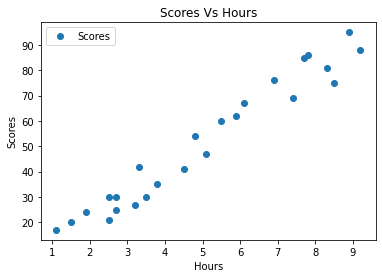

In [38]:
df.plot(x="Hours",y="Scores",style="o")
# OR plt.scatter(x,y)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores Vs Hours")
plt.show()

### **train_test_split : to decide the data to be considered for training and testing**

In [39]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
print("x_train = ",x_train)

x_train =  [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [41]:
print("x_test = ",x_test)

x_test =  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
print("y_train = ",y_train)

y_train =  [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [43]:
print("y_test = ",y_test)

y_test =  [20 27 69 30 62]


### **Model Training / Fitting : to train the model using Linear Regression algorithm**

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression()

### **Visualization of the best fit line given by the Linear Regression model for the given data**

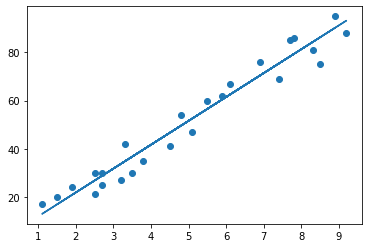

In [45]:
line = regressor.coef_ * x + regressor.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

### **Model Testing : prediction of possible score for the given number of hours of study**

In [46]:
y_pred = regressor.predict(x_test)

### **Comparison between y_test and y_pred :** 
### **to compare between the actual true score and the predicted score**

In [47]:
comparison = pd.DataFrame({"True" : y_test , "Predicted" : y_pred})
comparison

,True,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **prediction of the possible score for the number of hours of study entered as an input by the user**

In [48]:
while(True):

    try:
        hours_input = float(input("Enter the number of hours of study : "))
        
        if(hours_input >=0):
            no_of_hours = np.array( [ hours_input ] )
            no_of_hours = no_of_hours.reshape(-1,1)
            predicted_score = regressor.predict(no_of_hours)
            print("\nA student may obtain a score of about ", predicted_score," if he / she studies for ",hours_input, " hours")
            break

        else:
            print("Kindly enter a positive value\n")
        
    except:
        print("Kindly enter a positive intger\n")



Enter the number of hours of study : 3.4

A student may obtain a score of about  [35.71439208]  if he / she studies for  3.4  hours


### **To verify the accuracy of the model by the following metrics:**

### 1.   R2 Score
### 2.   Mean Absolute Error
### 3.   Mean Squared Error


In [49]:
from sklearn import metrics

# 1.   R2 Score
print(metrics.r2_score(y_test,y_pred))

# 2.   Mean Absolute Error
print(metrics.mean_absolute_error(y_test,y_pred))

# 3.   Mean Squared Error
print(metrics.mean_squared_error(y_test,y_pred))

0.9454906892105354
4.183859899002982
21.598769307217456


## **Hence, the model has an accuracy of 94.55 %**